<img src="https://drive.google.com/uc?export=view&id=1vWvnXPMPT1QPE2ODNo6xLw6c_HM3vEhb" style="float:right" width=220px height=250px>
<img src="https://drive.google.com/uc?export=view&id=1V9ezg6CTrDjdT22VJcQWwOnUQRUbBQ3E" style="float:left" width=180px height=100px>

<h1 id="encabezado" align="center">Analísis de datos: King County Real State</h1>

<img src="https://drive.google.com/uc?export=view&id=1n0IJNWI51NhSLLsq2Gwi--Kk-MclnfLG" align="center" width=700px height=500px>

<font color="navy" size=4px><b>
Colaboradores: <br>
Thomas Eduardo Medina Sánchez<br>
Diego Armando Luna Zavalija<br>
Monterrey, N.L, México </b></font> <br> <hr>

# King County Real State



Se tiene un set de datos con las ventas de bienes raíces en el condado de King, en Washington.



El set tiene los siguientes campos:



- **id**: Identificador de la operación de compra-venta.
- **fecha_operacion**: Fecha en que se realizó la operación.
- **precio**: Precio al que fue vendida la propiedad.
- **remamaras**: Número de recámaras en la propiedad.
- **baños**: Número de baños de la propiedad.
- **m2_construcción**: Metros cuadrados de construcción en la propiedad.
- **m2_terreno**: Metros cuadrados de terreno en la propiedad.
- **pisos**: Número de pisos de la propiedad.
- **frente_agua**: Índice que representa si la propiedad da frente a una fuente de agua (mar, lago, laguna).
-- 0 es NO
-- 1 es SI.
- **vista**: Índice que indica qué tan buena es la vista panorámica de la propiedad.
-- 0 es SIN VISTA.
-- 1 es VISTA ESTÁNDAR
-- 2 es VISTA ABIERTA
-- 3 es VISTA PANORÁMICA
-- 4 es VISTA EXCEPCIONAL
- **condición**: Índice que indica la condición física del apartamento.
-- 1 es MALAS CONDICIONES
-- 2 es CONDICIONES REGULARES
-- 3 es BUENAS CONDICIONES
-- 4 es MUY BUENAS CONDICIONES
-- 5 es EXCELENTES CONDICIONES
- **calidad**: Índice que indica la calidad de acabados y diseño de la propiedad.
-- De 1 a 3 es DISEÑO ANTICUADO
-- De 3 a 7 es DISEÑO PROMEDIO
-- De 7 a 11 es DISEÑO INNOVADOR
-- De 11 A 13 es DISEÑO EXCEPCIONAL
- **m2_sobre_calle**: Metros de la construcción que están sobre nivel de calle.
- **m2_sotano**: Metros de la construcción que están bajo el nivel de calle (sótano).
- **año_construcción**: Año de construcción de la propiedad.
- **año_renovación**: Año en que se remodeló la propiedad, en su caso. 0 indica que no se ha renovado nunca.
- **código_postal**: Código postal de la propiedad.
- **latitud**: Latitud del punto de geolocalización de la propiedad.
- **longitud**: Longitud del punto de geolocalización de la propiedad.
- **m2_construcción_vecinal**: Metros de construcción promedio de las propiedades 15 casas a la redonda.
- **m2_terreno_vecinal**: Metros de terreno promedio de las propiedades 15 casas a la redonda.
- **agente_id**: Identificador del agente inmobiliario que realizó la venta.
- **nombre_agente**: Nombre del agente inmobiliario que realizó la venta.

### Preparación y limpieza de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data_sp.csv')
df.head()

,id,fecha_operación,precio,recamaras,baños,m2_construcción,m2_terreno,pisos,frente_agua,vista,...,m2_sobre_calle,m2_sotano,año_construcción,año_renovación,código_postal,latitud,longitud,m2_construcción_vecinal,m2_terreno_vecinal,agente_id
0,123059127,02/05/2014,625000,4,3.25,832.1,16463.5,1.0,0,0,...,1560,1170,2007,0,98059,47.5133,-122.110,2730,111274,9
1,472000620,02/05/2014,790000,3,2.50,792.5,1447.8,1.0,0,0,...,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,8
2,587550340,02/05/2014,604000,3,2.50,987.6,10104.4,2.0,0,2,...,3240,0,1995,0,98023,47.3256,-122.378,4050,24967,7
3,776600130,02/05/2014,275000,3,1.50,359.7,3132.4,1.0,0,0,...,1180,0,1983,0,98045,47.4880,-121.787,1680,11104,1
4,943100683,02/05/2014,335000,3,2.25,481.6,4942.3,1.0,0,0,...,1580,0,1978,0,98024,47.5643,-121.897,1450,16215,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21613 non-null  int64  
 1   fecha_operación          21613 non-null  object 
 2   precio                   21613 non-null  int64  
 3   recamaras                21613 non-null  int64  
 4   baños                    21613 non-null  float64
 5   m2_construcción          21613 non-null  float64
 6   m2_terreno               21613 non-null  float64
 7   pisos                    21613 non-null  float64
 8   frente_agua              21613 non-null  int64  
 9   vista                    21613 non-null  int64  
 10  condición                21613 non-null  int64  
 11  calidad                  21613 non-null  int64  
 12  m2_sobre_calle           21613 non-null  int64  
 13  m2_sotano                21613 non-null  int64  
 14  año_construcción      

#### Creación de nuevas categorias

In [4]:
df['calidad_propiedad'] = pd.cut(df['calidad'],bins=[1,3,7,11,13],
                        labels=['DISEÑO ANTICUADO','DISEÑO PROMEDIO',
                        'DISEÑO INNOVADOR', 'DISEÑO EXCEPCIONAL'])

In [5]:
vistas=['SIN VISTA','VISTA ESTÁNDAR','VISTA ABIERTA', 'VISTA PANORÁMICA', 'VISTA EXCEPCIONAL']
codigos=[0,1,2,3,4]
lista = list(zip(codigos,vistas))
df_vistas = pd.DataFrame(lista)

In [6]:
df_vistas.rename(columns={0:'vista',1:'vista_propiedad'},inplace=True)

In [7]:
df = df.merge(df_vistas, how='inner', on='vista')

In [8]:
agua=['NO','SI']
codigos=[0,1]
lista = list(zip(codigos,agua))
df_agua = pd.DataFrame(lista)
df_agua.rename(columns={0:'frente_agua',1:'frente_agua_propiedad'},inplace=True)

In [9]:
df = df.merge(df_agua, how='inner', on='frente_agua')
df.head()

,id,fecha_operación,precio,recamaras,baños,m2_construcción,m2_terreno,pisos,frente_agua,vista,...,año_renovación,código_postal,latitud,longitud,m2_construcción_vecinal,m2_terreno_vecinal,agente_id,calidad_propiedad,vista_propiedad,frente_agua_propiedad
0,123059127,02/05/2014,625000,4,3.25,832.1,16463.5,1.0,0,0,...,0,98059,47.5133,-122.110,2730,111274,9,DISEÑO INNOVADOR,SIN VISTA,NO
1,472000620,02/05/2014,790000,3,2.50,792.5,1447.8,1.0,0,0,...,0,98117,47.6833,-122.400,2380,4750,8,DISEÑO INNOVADOR,SIN VISTA,NO
2,776600130,02/05/2014,275000,3,1.50,359.7,3132.4,1.0,0,0,...,0,98045,47.4880,-121.787,1680,11104,1,DISEÑO PROMEDIO,SIN VISTA,NO
3,943100683,02/05/2014,335000,3,2.25,481.6,4942.3,1.0,0,0,...,0,98024,47.5643,-121.897,1450,16215,11,DISEÑO PROMEDIO,SIN VISTA,NO
4,1024069009,02/05/2014,675000,5,2.50,859.5,20579.5,2.0,0,0,...,0,98029,47.5794,-122.025,2820,48351,7,DISEÑO INNOVADOR,SIN VISTA,NO


In [10]:
df.head()

,id,fecha_operación,precio,recamaras,baños,m2_construcción,m2_terreno,pisos,frente_agua,vista,...,año_renovación,código_postal,latitud,longitud,m2_construcción_vecinal,m2_terreno_vecinal,agente_id,calidad_propiedad,vista_propiedad,frente_agua_propiedad
0,123059127,02/05/2014,625000,4,3.25,832.1,16463.5,1.0,0,0,...,0,98059,47.5133,-122.110,2730,111274,9,DISEÑO INNOVADOR,SIN VISTA,NO
1,472000620,02/05/2014,790000,3,2.50,792.5,1447.8,1.0,0,0,...,0,98117,47.6833,-122.400,2380,4750,8,DISEÑO INNOVADOR,SIN VISTA,NO
2,776600130,02/05/2014,275000,3,1.50,359.7,3132.4,1.0,0,0,...,0,98045,47.4880,-121.787,1680,11104,1,DISEÑO PROMEDIO,SIN VISTA,NO
3,943100683,02/05/2014,335000,3,2.25,481.6,4942.3,1.0,0,0,...,0,98024,47.5643,-121.897,1450,16215,11,DISEÑO PROMEDIO,SIN VISTA,NO
4,1024069009,02/05/2014,675000,5,2.50,859.5,20579.5,2.0,0,0,...,0,98029,47.5794,-122.025,2820,48351,7,DISEÑO INNOVADOR,SIN VISTA,NO


In [11]:
df['fecha_operación'] = pd.to_datetime(df['fecha_operación'], format="%d/%m/%Y")
df['fecha_operación'].head()

0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: fecha_operación, dtype: datetime64[ns]

In [12]:
df.id = df.id.astype('str')
df.precio = df.precio.astype('float')
df.precio.dtypes

dtype('float64')

In [13]:
agentes={
    1:'WINDERMERE',
    2:'GINA JEANNOT',
    3:'MELANIE ANTONUCCI',
    4:'CARRIE FOLEY- COMPASS',
    5:'RACHEL ADLER',
    6:'TEAMUP AT COLDWELL',
    7:'SKYLINE PROPERTIES',
    8:'FLYHOMES',
    9:'FRANK PAINTER - NEOHOMES',
    10:'CHAMPMAN HOMES',
    11:'OWNER'
}
df_agentes = pd.Series(agentes)
df_agentes = pd.DataFrame(df_agentes)
df_agentes = df_agentes.reset_index()
df_agentes.rename(columns={'index':'agente_id',0:'Nombre_agente'},inplace=True)
df_agentes

,agente_id,Nombre_agente
0,1,WINDERMERE
1,2,GINA JEANNOT
2,3,MELANIE ANTONUCCI
3,4,CARRIE FOLEY- COMPASS
4,5,RACHEL ADLER
5,6,TEAMUP AT COLDWELL
6,7,SKYLINE PROPERTIES
7,8,FLYHOMES
8,9,FRANK PAINTER - NEOHOMES
9,10,CHAMPMAN HOMES


In [14]:
df = df.merge(df_agentes, how='inner', on='agente_id')
df.head()

,id,fecha_operación,precio,recamaras,baños,m2_construcción,m2_terreno,pisos,frente_agua,vista,...,código_postal,latitud,longitud,m2_construcción_vecinal,m2_terreno_vecinal,agente_id,calidad_propiedad,vista_propiedad,frente_agua_propiedad,Nombre_agente
0,123059127,2014-05-02,625000.0,4,3.25,832.1,16463.5,1.0,0,0,...,98059,47.5133,-122.110,2730,111274,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES
1,1868902745,2014-05-02,805000.0,3,2.00,826.0,1371.6,1.5,0,0,...,98115,47.6747,-122.295,2060,4500,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES
2,1982201345,2014-05-02,440000.0,2,1.00,243.8,1478.3,1.0,0,0,...,98107,47.6639,-122.364,1150,4365,9,DISEÑO PROMEDIO,SIN VISTA,NO,FRANK PAINTER - NEOHOMES
3,2591720070,2014-05-02,482000.0,4,2.50,826.0,10932.6,2.0,0,0,...,98038,47.3750,-122.022,2780,36224,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES
4,5652600185,2014-05-02,750000.0,3,1.75,682.8,3224.2,2.0,0,0,...,98115,47.6954,-122.292,1570,10578,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES


In [15]:
condiciones={
    1:'MALAS CONDICIONES',
    2:'CONDICIONES REGULARES',
    3:'BUENAS CONDICIONES',
    4:'MUY BUENAS CONDICIONES',
    5:'EXCELENTES CONDICIONES',
}

df_con = pd.Series(condiciones)
df_con = pd.DataFrame(df_con)
df_con = df_con.reset_index()
df_con.rename(columns={'index':'condición',0:'condicion_propiedad'},inplace=True)
df_con.head()

,condición,condicion_propiedad
0,1,MALAS CONDICIONES
1,2,CONDICIONES REGULARES
2,3,BUENAS CONDICIONES
3,4,MUY BUENAS CONDICIONES
4,5,EXCELENTES CONDICIONES


In [16]:
df = df.merge(df_con, how='inner', on='condición')
df.head()

,id,fecha_operación,precio,recamaras,baños,m2_construcción,m2_terreno,pisos,frente_agua,vista,...,latitud,longitud,m2_construcción_vecinal,m2_terreno_vecinal,agente_id,calidad_propiedad,vista_propiedad,frente_agua_propiedad,Nombre_agente,condicion_propiedad
0,123059127,2014-05-02,625000.0,4,3.25,832.1,16463.5,1.0,0,0,...,47.5133,-122.110,2730,111274,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES,BUENAS CONDICIONES
1,2591720070,2014-05-02,482000.0,4,2.50,826.0,10932.6,2.0,0,0,...,47.3750,-122.022,2780,36224,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES,BUENAS CONDICIONES
2,993001330,2014-05-05,406100.0,3,2.25,429.8,406.0,3.0,0,0,...,47.6916,-122.340,1430,1448,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES,BUENAS CONDICIONES
3,2558720120,2014-05-05,487585.0,4,1.75,612.6,2807.5,1.0,0,0,...,47.7206,-122.171,1840,8500,9,DISEÑO PROMEDIO,SIN VISTA,NO,FRANK PAINTER - NEOHOMES,BUENAS CONDICIONES
4,3629910240,2014-05-05,705380.0,3,2.50,759.0,1323.7,2.0,0,0,...,47.5493,-121.993,2130,4106,9,DISEÑO INNOVADOR,SIN VISTA,NO,FRANK PAINTER - NEOHOMES,BUENAS CONDICIONES


In [17]:
df['año'] = df['fecha_operación'].dt.year

In [18]:
df_dispersion = df[(df.precio<=2000000) & (df.m2_terreno<=10000)]

En el dataframe "df_dispersion" se descartan algunos valores atípicos para mejorar el procesamiento y la visualización de algunos gráficos.

### 1.- Estadística básica de campos importantes.

In [19]:
# Estadistica descriptiva de los campos cuantitativos mas importantes.
df[['precio','m2_construcción','m2_terreno','pisos','m2_construcción_vecinal',
    'm2_terreno_vecinal','m2_sobre_calle','m2_sotano']].describe()

,precio,m2_construcción,m2_terreno,pisos,m2_construcción_vecinal,m2_terreno_vecinal,m2_sobre_calle,m2_sotano
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,633.953320,4604.604183,1.494309,1986.552492,12768.455652,1788.390691,291.509045
std,3.671272e+05,279.941234,12624.971582,0.539989,685.391304,27304.179631,828.090978,442.575043
min,7.500000e+04,88.400000,158.500000,1.000000,399.000000,651.000000,290.000000,0.000000
25%,3.219500e+05,434.900000,1536.200000,1.000000,1490.000000,5100.000000,1190.000000,0.000000
50%,4.500000e+05,582.200000,2322.000000,1.500000,1840.000000,7620.000000,1560.000000,0.000000
75%,6.450000e+05,777.200000,3257.700000,2.000000,2360.000000,10083.000000,2210.000000,560.000000
max,7.700000e+06,4127.000000,503334.200000,3.500000,6210.000000,871200.000000,9410.000000,4820.000000


### 2.- Tabla de frecuencias

In [20]:
# Estadistica descritiva de las variable cualitativa "Nombre_agente".
df_tabla = df['Nombre_agente'].value_counts()
df_tabla = pd.DataFrame(df_tabla)
df_tabla.rename(columns={'Nombre_agente':'fi'}, inplace=True)
df_tabla['hi'] = df_tabla.fi / len(df)
Fi = df_tabla.fi
lista_valores=[]
acumulador=0
for x in Fi:
    acumulador+=x
    lista_valores.append(acumulador)
df_tabla['Fi']=lista_valores
Hi = df_tabla.hi
lista_hi=[]
acumulador=0
for i in Hi:
    acumulador+=i
    lista_hi.append(acumulador)
df_tabla['Hi']=lista_hi
df_tabla

,fi,hi,Fi,Hi
OWNER,5501,0.254523,5501,0.254523
WINDERMERE,3854,0.178319,9355,0.432841
GINA JEANNOT,1803,0.083422,11158,0.516263
FRANK PAINTER - NEOHOMES,1781,0.082404,12939,0.598667
SKYLINE PROPERTIES,1642,0.075973,14581,0.674640
RACHEL ADLER,1397,0.064637,15978,0.739277
TEAMUP AT COLDWELL,1366,0.063203,17344,0.802480
FLYHOMES,1349,0.062416,18693,0.864896
CARRIE FOLEY- COMPASS,1132,0.052376,19825,0.917272
CHAMPMAN HOMES,981,0.045389,20806,0.962661


In [21]:
# Estadistica descritiva de las variable cualitativa "frente_agua_propiedad".
df_frente = df['frente_agua_propiedad'].value_counts()
df_frente = pd.DataFrame(df_frente)
df_frente.rename(columns={'frente_agua_propiedad':'fi'}, inplace=True)
df_frente['hi'] = df_frente.fi / len(df)
Fi = df_frente.fi
lista_valores=[]
acumulador=0
for x in Fi:
    acumulador+=x
    lista_valores.append(acumulador)
df_frente['Fi']=lista_valores
Hi = df_frente.hi
lista_hi=[]
acumulador=0
for i in Hi:
    acumulador+=i
    lista_hi.append(acumulador)
df_frente['Hi']=lista_hi
df_frente

,fi,hi,Fi,Hi
NO,21450,0.992458,21450,0.992458
SI,163,0.007542,21613,1.000000


In [22]:
# Estadistica descritiva de las variable cualitativa "condicion_propiedad"
df_c = df['condicion_propiedad'].value_counts()
df_c = pd.DataFrame(df_c)
df_c.rename(columns={'condicion_propiedad':'fi'}, inplace=True)
df_c['hi'] = df_c.fi / len(df)
Fi = df_c.fi
lista_valores=[]
acumulador=0
for x in Fi:
    acumulador+=x
    lista_valores.append(acumulador)
df_c['Fi']=lista_valores
Hi = df_c.hi
lista_hi=[]
acumulador=0
for i in Hi:
    acumulador+=i
    lista_hi.append(acumulador)
df_c['Hi']=lista_hi
df_c

,fi,hi,Fi,Hi
BUENAS CONDICIONES,14031,0.649193,14031,0.649193
MUY BUENAS CONDICIONES,5679,0.262759,19710,0.911951
EXCELENTES CONDICIONES,1701,0.078703,21411,0.990654
CONDICIONES REGULARES,172,0.007958,21583,0.998612
MALAS CONDICIONES,30,0.001388,21613,1.000000


In [23]:
# Estadistica descritiva de las variable cualitativa "vista_propiedad"
df_v = df['vista_propiedad'].value_counts()
df_v = pd.DataFrame(df_v)
df_v.rename(columns={'vista_propiedad':'fi'}, inplace=True)
df_v['hi'] = df_v['fi'] / len(df)
Fi = df_v['fi']
lista_valores=[]
acumulador=0
for x in Fi:
    acumulador+=x
    lista_valores.append(acumulador)
df_v['Fi']=lista_valores
Hi = df_v.hi
lista_hi=[]
acumulador=0
for i in Hi:
    acumulador+=i
    lista_hi.append(acumulador)
df_v['Hi']=lista_hi
df_v

,fi,hi,Fi,Hi
SIN VISTA,19489,0.901726,19489,0.901726
VISTA ABIERTA,963,0.044557,20452,0.946282
VISTA PANORÁMICA,510,0.023597,20962,0.969879
VISTA ESTÁNDAR,332,0.015361,21294,0.985240
VISTA EXCEPCIONAL,319,0.014760,21613,1.000000


In [24]:
# Estadistica descritiva de las variable cualitativa "calidad_propiedad"
df_cal = df['calidad_propiedad'].value_counts()
df_cal = pd.DataFrame(df_cal)
df_cal.rename(columns={'calidad_propiedad':'fi'}, inplace=True)
df_cal['hi'] = df_cal['fi'] / len(df)
Fi = df_cal['fi']
lista_valores=[]
acumulador=0
for x in Fi:
    acumulador+=x
    lista_valores.append(acumulador)
df_cal['Fi']=lista_valores
Hi = df_cal.hi
lista_hi=[]
acumulador=0
for i in Hi:
    acumulador+=i
    lista_hi.append(acumulador)
df_cal['Hi']=lista_hi
df_cal

,fi,hi,Fi,Hi
DISEÑO PROMEDIO,11290,0.522371,11290,0.522371
DISEÑO INNOVADOR,10216,0.472678,21506,0.995049
DISEÑO EXCEPCIONAL,103,0.004766,21609,0.999815
DISEÑO ANTICUADO,3,0.000139,21612,0.999954


### 3.- Tablas de información cruzada

In [25]:
# Casas clasificadas por calidad y condiciones
pd.crosstab(index=df.condicion_propiedad,
           columns=df.calidad_propiedad, margins=True)

calidad_propiedad,DISEÑO ANTICUADO,DISEÑO PROMEDIO,DISEÑO INNOVADOR,DISEÑO EXCEPCIONAL,All
condicion_propiedad,,,,,
BUENAS CONDICIONES,1,6382,7563,85,14031
CONDICIONES REGULARES,1,154,17,0,172
EXCELENTES CONDICIONES,1,1115,582,3,1701
MALAS CONDICIONES,0,27,2,0,29
MUY BUENAS CONDICIONES,0,3612,2052,15,5679
All,3,11290,10216,103,21612


In [26]:
# Casas clasificadas por vista y frente al agua
pd.crosstab(index=df.vista_propiedad,
           columns=df.frente_agua_propiedad, margins=True)

frente_agua_propiedad,NO,SI,All
vista_propiedad,,,
SIN VISTA,19489,0,19489
VISTA ABIERTA,955,8,963
VISTA ESTÁNDAR,331,1,332
VISTA EXCEPCIONAL,184,135,319
VISTA PANORÁMICA,491,19,510
All,21450,163,21613


In [27]:
# Ventas clasificadas por agente y condición
pd.crosstab(index=df.Nombre_agente,
           columns=df.condicion_propiedad, margins=True)

condicion_propiedad,BUENAS CONDICIONES,CONDICIONES REGULARES,EXCELENTES CONDICIONES,MALAS CONDICIONES,MUY BUENAS CONDICIONES,All
Nombre_agente,,,,,,
CARRIE FOLEY- COMPASS,733,7,88,0,304,1132
CHAMPMAN HOMES,634,7,66,0,274,981
FLYHOMES,916,9,84,1,339,1349
FRANK PAINTER - NEOHOMES,1131,14,140,4,492,1781
GINA JEANNOT,1159,12,142,4,486,1803
MELANIE ANTONUCCI,519,10,69,4,205,807
OWNER,3547,46,421,5,1482,5501
RACHEL ADLER,896,10,118,4,369,1397
SKYLINE PROPERTIES,1063,21,134,1,423,1642


In [28]:
# Ventas clasificadas por agente y calidad
pd.crosstab(index=df.Nombre_agente,
           columns=df.calidad_propiedad, margins=True)

calidad_propiedad,DISEÑO ANTICUADO,DISEÑO PROMEDIO,DISEÑO INNOVADOR,DISEÑO EXCEPCIONAL,All
Nombre_agente,,,,,
CARRIE FOLEY- COMPASS,0,581,550,1,1132
CHAMPMAN HOMES,0,511,464,6,981
FLYHOMES,1,699,644,5,1349
FRANK PAINTER - NEOHOMES,0,915,856,9,1780
GINA JEANNOT,0,932,858,13,1803
MELANIE ANTONUCCI,0,443,361,3,807
OWNER,1,2845,2634,21,5501
RACHEL ADLER,0,724,670,3,1397
SKYLINE PROPERTIES,0,850,780,12,1642


In [29]:
# Casas clasificadas por calidad y vista
pd.crosstab(index=df.calidad_propiedad,
           columns=df.vista_propiedad, margins=True)

vista_propiedad,SIN VISTA,VISTA ABIERTA,VISTA ESTÁNDAR,VISTA EXCEPCIONAL,VISTA PANORÁMICA,All
calidad_propiedad,,,,,,
DISEÑO ANTICUADO,3,0,0,0,0,3
DISEÑO PROMEDIO,10766,271,113,47,93,11290
DISEÑO INNOVADOR,8671,676,217,247,405,10216
DISEÑO EXCEPCIONAL,48,16,2,25,12,103
All,19488,963,332,319,510,21612


In [30]:
# Clasificación de ventas por agente y año
pd.crosstab(index=df.Nombre_agente,
           columns=df.año, margins=True)

año,2014,2015,All
Nombre_agente,,,
CARRIE FOLEY- COMPASS,770,362,1132
CHAMPMAN HOMES,683,298,981
FLYHOMES,878,471,1349
FRANK PAINTER - NEOHOMES,1211,570,1781
GINA JEANNOT,1221,582,1803
MELANIE ANTONUCCI,572,235,807
OWNER,3727,1774,5501
RACHEL ADLER,940,457,1397
SKYLINE PROPERTIES,1121,521,1642


### 4.- Histogramas

La media es: 509554.624
La mediana es: 440000.000
La desviación estandar es: 283207.312


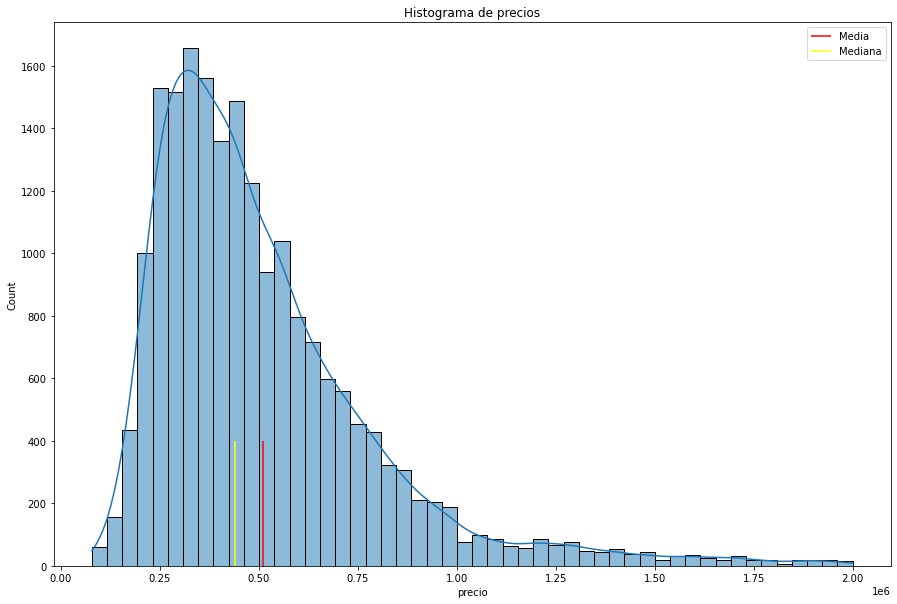

In [31]:
var = df_dispersion.precio
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(var,kde=True,ax=ax,bins=50)
plt.vlines(var.mean(),0,400,color='red',label='Media') 
plt.vlines(np.median(var),0,400,color='yellow',label='Mediana') 
plt.legend()
plt.title('Histograma de precios')

#print('La media es: {:.3f}'.format(var.mean()))
print(f'La media es: {round(var.mean(),3)}')
print('La mediana es: {:.3f}'.format(np.median(var)))
print('La desviación estandar es: {:.3f}'.format(var.std()))

**Aqui podemos observar que la mayor cantidad de ventas en base al precio, oscila entre los 250 mil y 500 mil dolares.**
**El histograma es unimodal, de distribución asimétrica negativa, y curtosis leptocúrtica**

La media es: 2447.569
La mediana es: 2220.800
La desviación estandar es: 1495.332


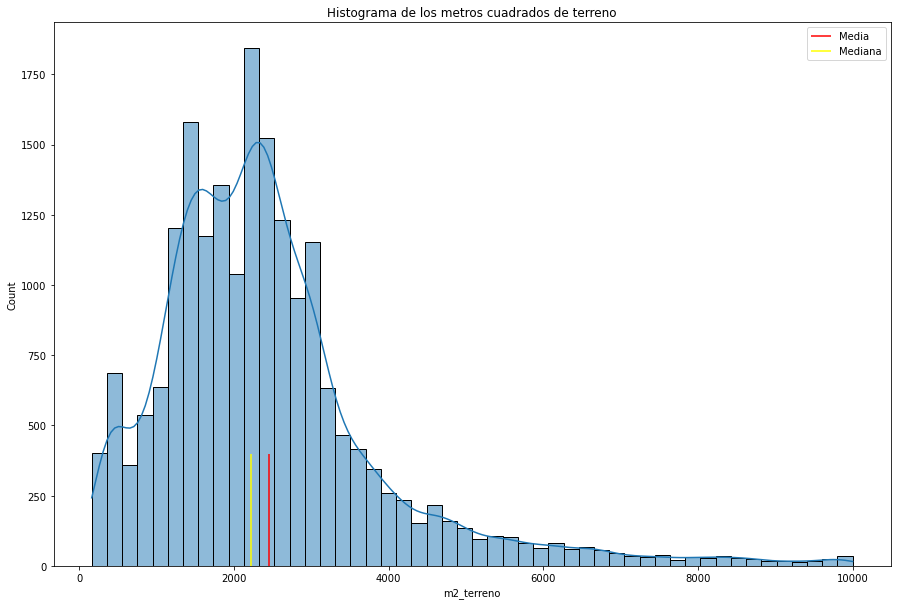

In [32]:
var = df_dispersion.m2_terreno
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(var,kde=True,ax=ax,bins=50)
plt.vlines(var.mean(),0,400,color='red',label='Media') 
plt.vlines(np.median(var),0,400,color='yellow',label='Mediana') 
plt.legend()
plt.title('Histograma de los metros cuadrados de terreno')

#print('La media es: {:.3f}'.format(var.mean()))
print(f'La media es: {round(var.mean(),3)}')
print('La mediana es: {:.3f}'.format(np.median(var)))
print('La desviación estandar es: {:.3f}'.format(var.std()))

**Aqui podemos observar que la mayor cantidad de ventas en base al terreno oscila entorno a los 2 mil metros cuadrados, El histograma es multimodal de distribución asimétrica negativa y curtosis leptocúrtica**

La media es: 609.022
La mediana es: 566.900
La desviación estandar es: 249.476


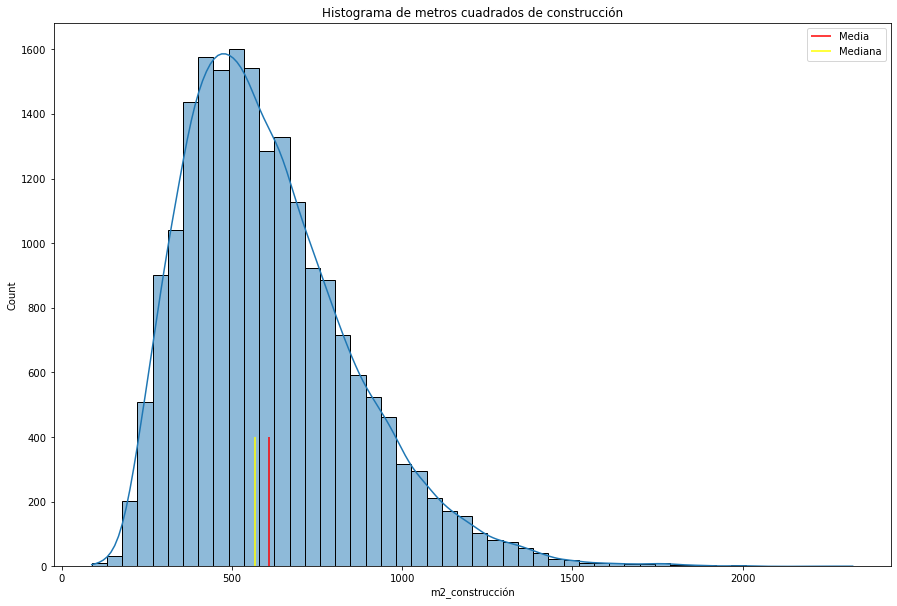

In [33]:
var = df_dispersion['m2_construcción']
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(var,kde=True,ax=ax,bins=50)
plt.vlines(var.mean(),0,400,color='red',label='Media') 
plt.vlines(np.median(var),0,400,color='yellow',label='Mediana') 
plt.legend()
plt.title('Histograma de metros cuadrados de construcción')

#print('La media es: {:.3f}'.format(var.mean()))
print(f'La media es: {round(var.mean(),3)}')
print('La mediana es: {:.3f}'.format(np.median(var)))
print('La desviación estandar es: {:.3f}'.format(var.std()))

**En este histograma se observan que la mayor cantidad de ventas con respecto a los metros de construcción estan entorno a los 500 metros cuadrados. El histograma es unimodal, de distribución asimétrica negativa, y curtosis leptocúrtica.**

La media es: 1928.828
La mediana es: 1790.000
La desviación estandar es: 642.589


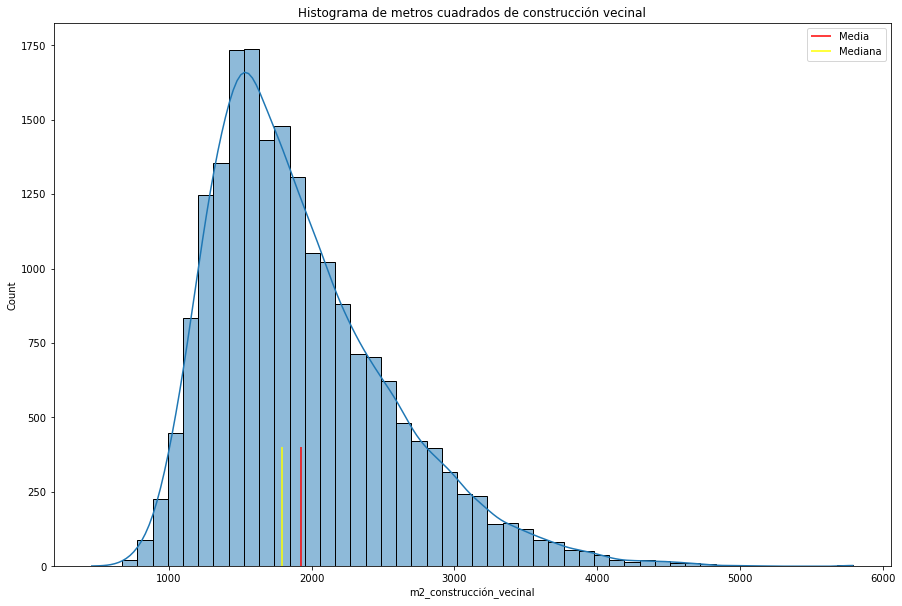

In [34]:
var = df_dispersion['m2_construcción_vecinal']
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(var,kde=True,ax=ax,bins=50)
plt.vlines(var.mean(),0,400,color='red',label='Media') 
plt.vlines(np.median(var),0,400,color='yellow',label='Mediana') 
plt.legend()
plt.title('Histograma de metros cuadrados de construcción vecinal')

#print('La media es: {:.3f}'.format(var.mean()))
print(f'La media es: {round(var.mean(),3)}')
print('La mediana es: {:.3f}'.format(np.median(var)))
print('La desviación estandar es: {:.3f}'.format(var.std()))

**En este histograma podemos observar que las ventas en relacion con la construccion vecinal se encuentra entre los 1300 y 2100 metros cuadrados. El histograma es unimodal, de distribución asimétrica negativa, y curtosis leptocúrtica**

La media es: 1714.438
La mediana es: 1520.000
La desviación estandar es: 743.371


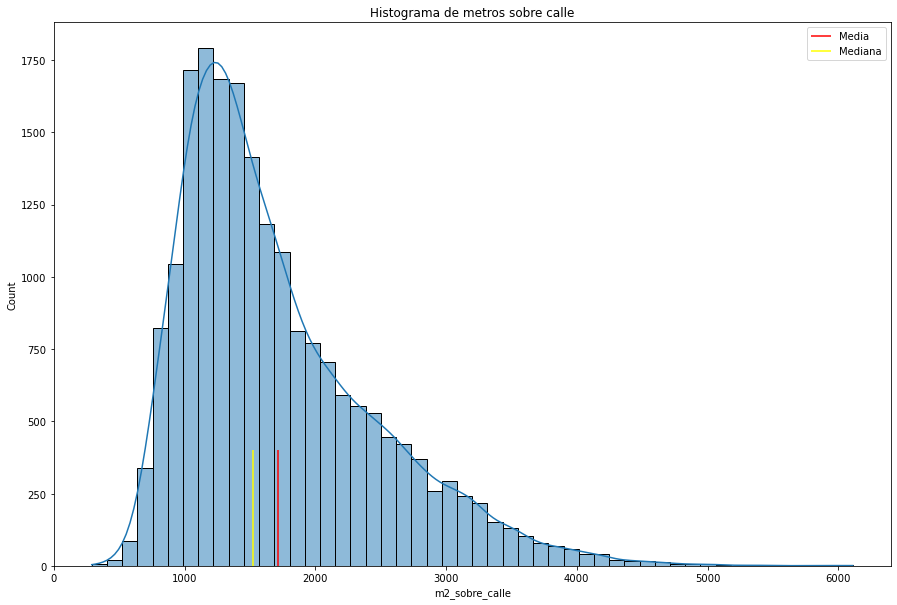

In [35]:
var = df_dispersion['m2_sobre_calle']
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(var,kde=True,ax=ax,bins=50)
plt.vlines(var.mean(),0,400,color='red',label='Media') 
plt.vlines(np.median(var),0,400,color='yellow',label='Mediana') 
plt.legend()
plt.title('Histograma de metros sobre calle')

#print('La media es: {:.3f}'.format(var.mean()))
print(f'La media es: {round(var.mean(),3)}')
print('La mediana es: {:.3f}'.format(np.median(var)))
print('La desviación estandar es: {:.3f}'.format(var.std()))

**Se observa que las ventas en relacion con los metros sobre calle oscila entre los 800 a los 1500 metros cuadrados. El histograma es unimodal, de distribución asimétrica negativa, y curtosis leptocúrtica**

### 5. Barras comparativas

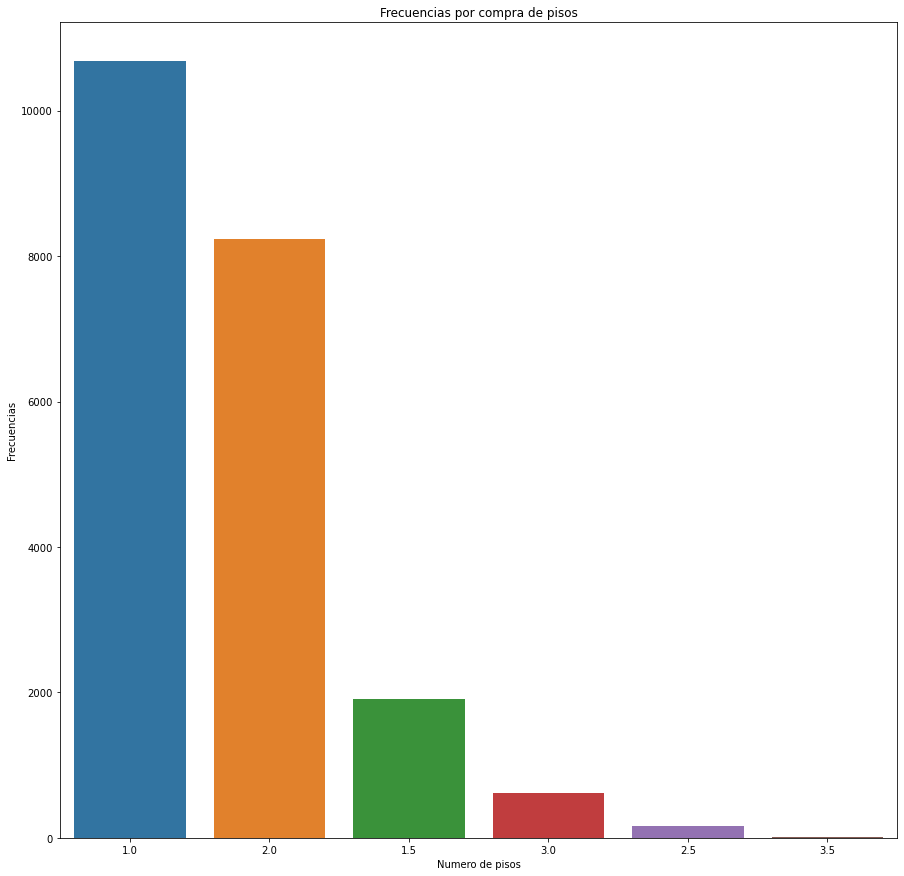

In [36]:
colores = ['red','yellow','purple','pink','blue']
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(x=df.pisos, order=df.pisos.value_counts().index)
_ = ax.set(title="Frecuencias por compra de pisos", ylabel='Frecuencias', xlabel='Numero de pisos')
plt.show()

**En esta grafica de barras se puede observar de forma sencilla que la mayor cantidad de terrenos vendidos cuenta con un solo piso en su propiedad, y que los terrenos con 3.5 pisos son menos vendidos.**

**Gráfica de remodelacion**

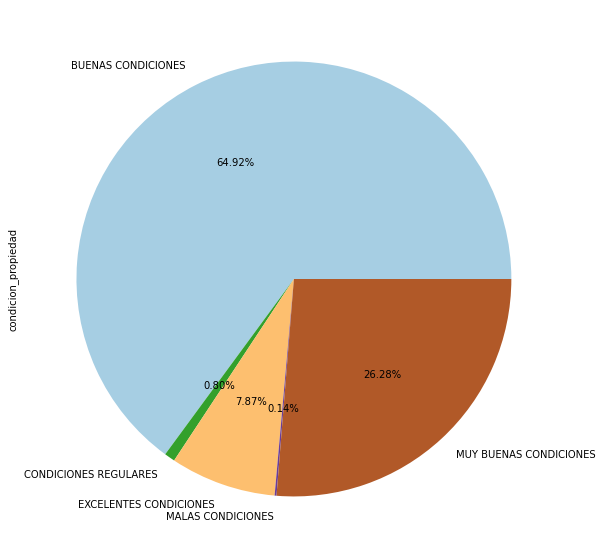

In [37]:
df.groupby('condicion_propiedad')['condicion_propiedad'].count().plot(kind='pie', cmap = 'Paired', 
           figsize = [10, 10], autopct='%.2f%%')
plt.show()

**Se puede observar que la mayor cantidad de propiedades vendidos se encuetran en buenas condiciones, y que las propiedades en condiciones regulares y malas condiciones son las menos vendidos**

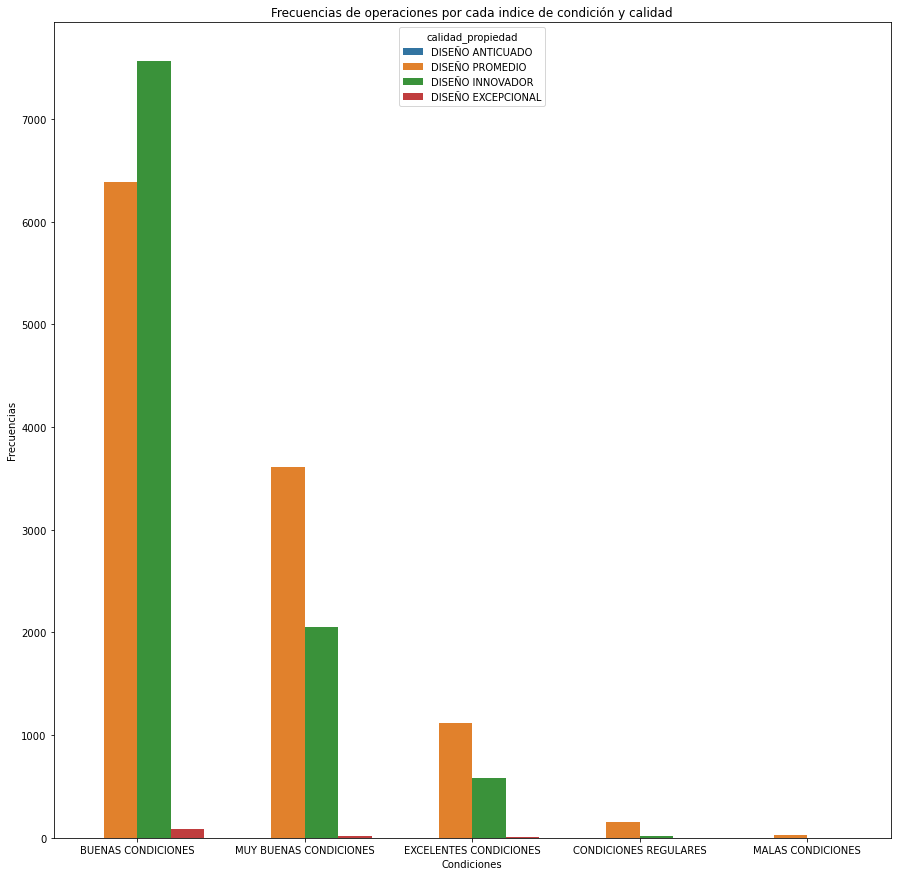

In [38]:
# Número de operaciones por cada condiciones
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(x=df.condicion_propiedad, order=df.condicion_propiedad.value_counts().index, hue=df['calidad_propiedad'])
_ = ax.set(title="Frecuencias de operaciones por cada indice de condición y calidad",
           ylabel='Frecuencias', xlabel='Condiciones')
plt.show()

**En esta grafica de barras, se puede que concluir la cantidad de propiedades vendidas en relacion a la calidad de la propiedad y sus condiciones, en donde encontramos que la mayor cantidad de terenos vendidos se encuentran en buenas y muy buenas condiciones, y estos cuentan con diseños en su mayoria promedios o inovadores**

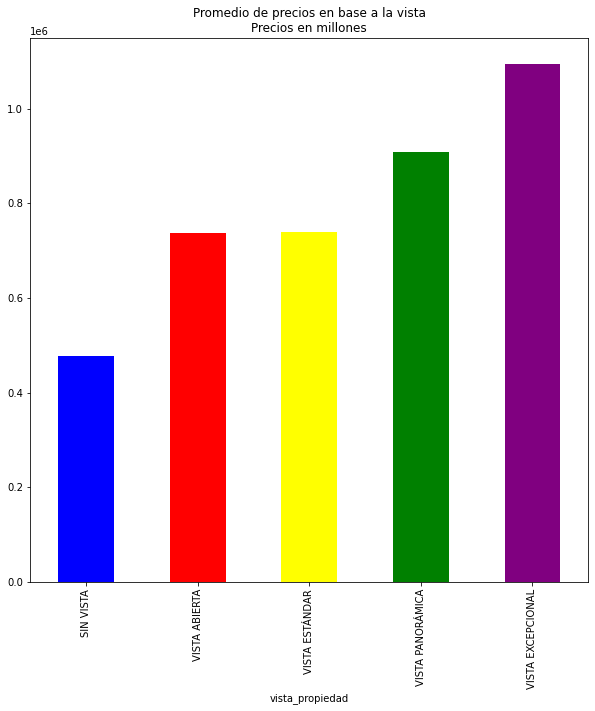

In [39]:
colores = ['Blue', 'Red', 'Yellow', 'Green', 'Purple']
df_dispersion.groupby('vista_propiedad')['precio'].mean().sort_values().plot(kind='bar', figsize = [10, 10], color=colores, title= "Promedio de precios en base a la vista\nPrecios en millones")
plt.show()

**En esta grafica de barras podemos concluir que las propiedades sin vista son mas baratas y las propiedades con vistas excepcionales y panoramicas tienen un promedio de ventas mas caro**

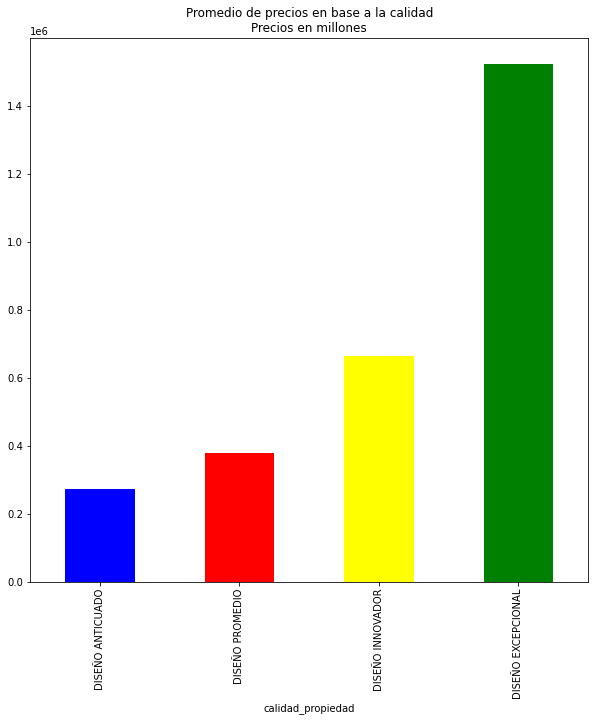

In [40]:
df_dispersion.groupby('calidad_propiedad')['precio'].mean().sort_values().plot(kind='bar', figsize = [10, 10], color = colores, title= "Promedio de precios en base a la calidad\nPrecios en millones")
plt.show()

**Se puede ver a simple vista que los diseños excepcionales son los que tienen un precio medio mas elevado que los que cuentan con diseños anticuados, promedios o innovador, por mas del doble**

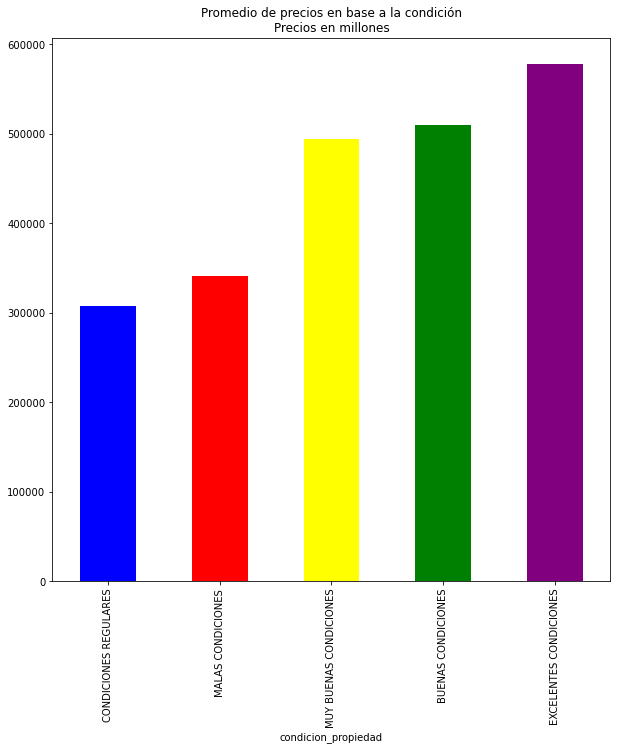

In [41]:
df_dispersion.groupby('condicion_propiedad')['precio'].mean().sort_values().plot(kind='bar', figsize = [10, 10], color=colores, title= "Promedio de precios en base a la condición\nPrecios en millones")
plt.show()

**En la grafica de barras anterior podemos ver que las propiedades que se encuentran en condiciones excelentes cuentan con un precio promedio mas alto, y que los terrenos en condiciones regulares son los que tienen el precio promedio mas bajo.**

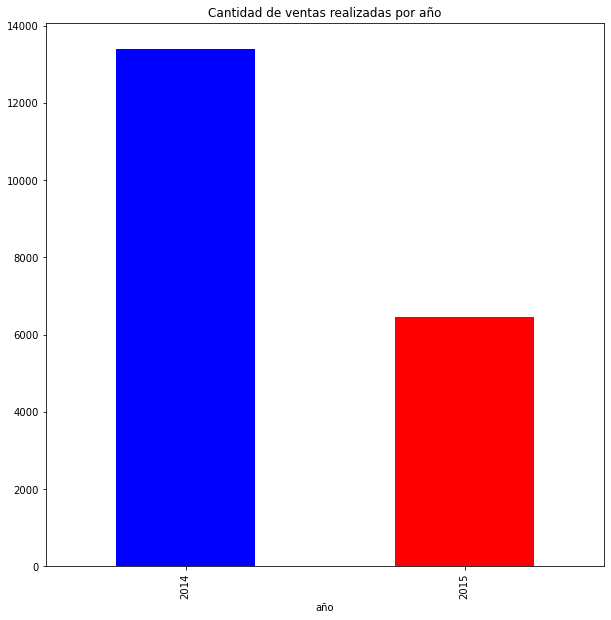

In [42]:
df_dispersion.groupby('año')['id'].count().plot(kind='bar', figsize = [10, 10], color=colores, title= "Cantidad de ventas realizadas por año")
plt.show()

**Podemos observar que se registraron mas del doble de ventas en el año 2014, respecto al siguiente año.**

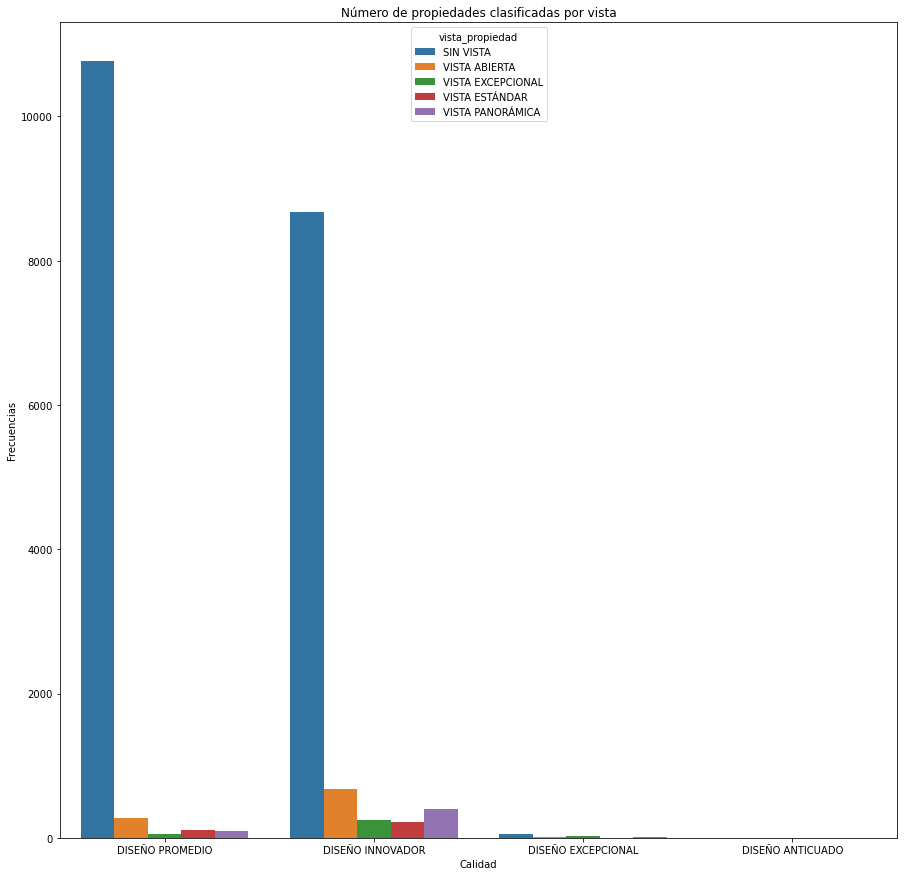

In [43]:
# Número de propiedades clasificadas por vista
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(x=df['calidad_propiedad'], order=df['calidad_propiedad'].value_counts().index, hue=df['vista_propiedad'])
_ = ax.set(title="Número de propiedades clasificadas por vista", ylabel='Frecuencias', xlabel='Calidad')
plt.show()

**Podemos observar que la cantidad de propiedades vendidas sin vista es mayor, contrastando estos datos con la grafica anterior de promedio de precios con relacion a la vista, podemos concluir que las propiedades sin vista son mas vendidas debido a que su precio en promedio es menor al resto de vistas**

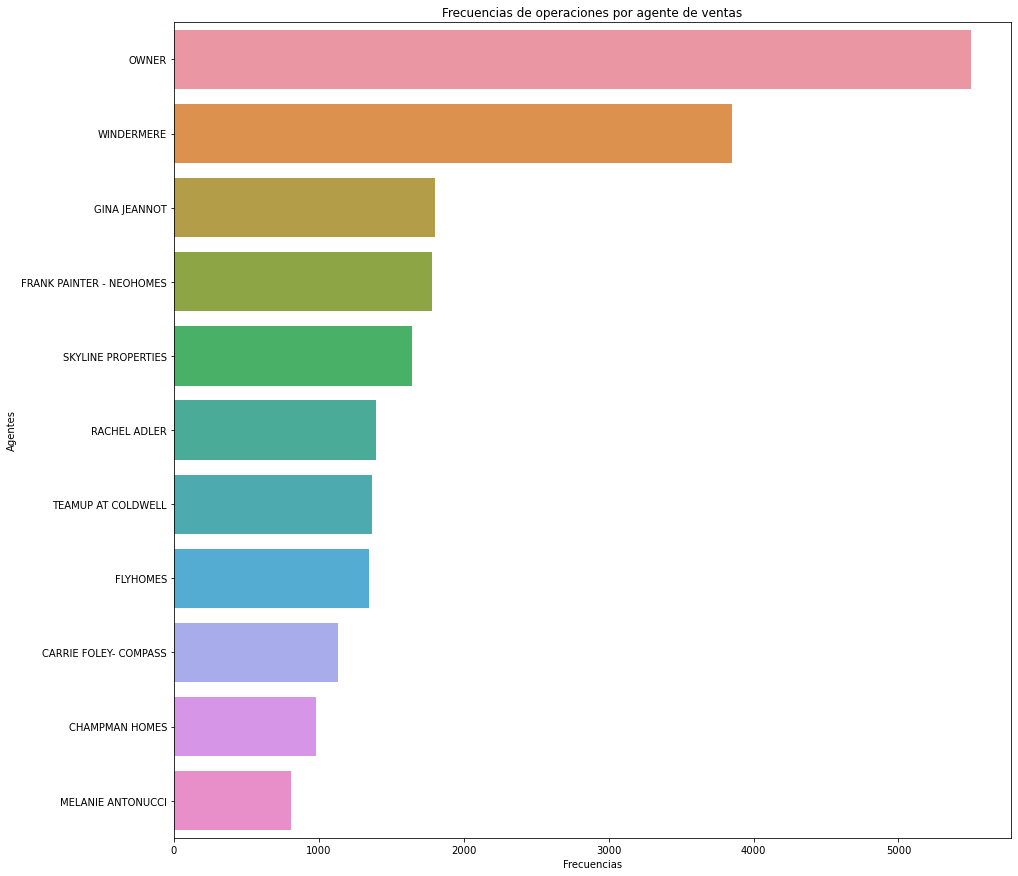

In [44]:
# Frecuencias de operaciones por agente de venta
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(y=df['Nombre_agente'], order=df['Nombre_agente'].value_counts().index)
_ = ax.set(title="Frecuencias de operaciones por agente de ventas", ylabel='Agentes', xlabel='Frecuencias')
plt.show()

**La mayor parte de los agentes tuvo un número de operaciones similar, a excepción de los agentes Windermere y Owner, quienes presentan un número de ventas significativamente mal alto.**

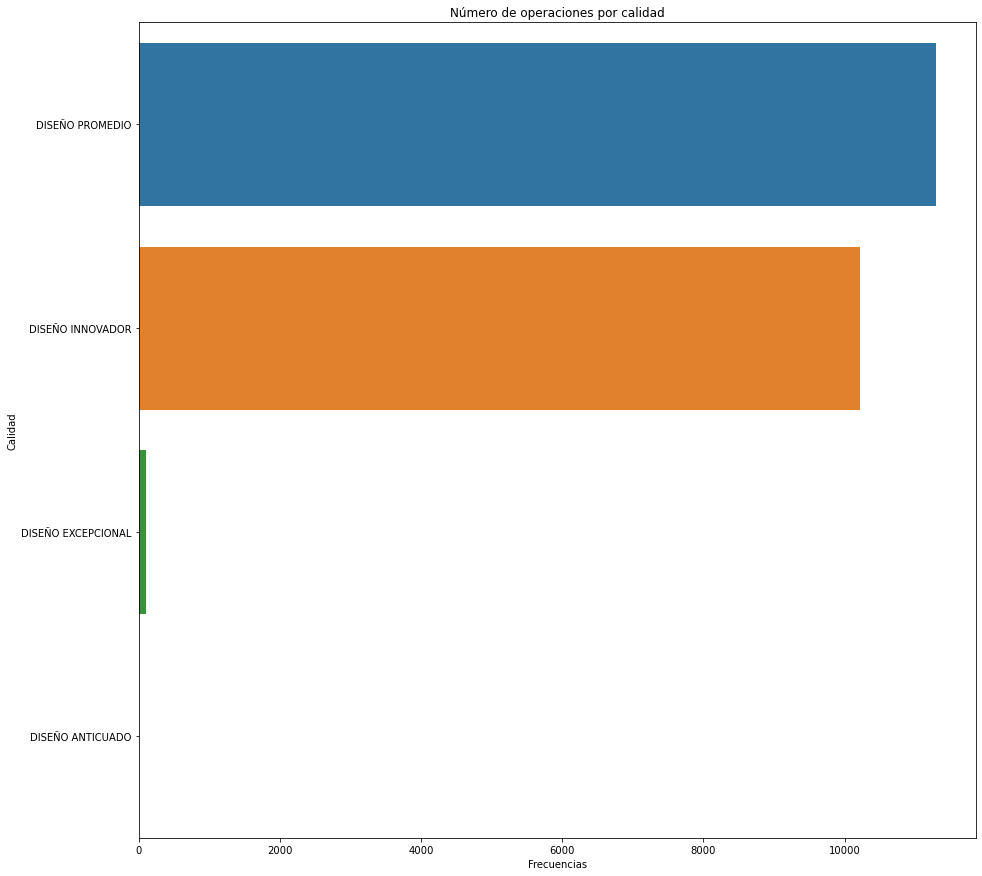

In [45]:
# Número de operaciones por calidad
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(y=df['calidad_propiedad'], order=df['calidad_propiedad'].value_counts().index)
_ = ax.set(title="Número de operaciones por calidad", ylabel='Calidad', xlabel='Frecuencias')
plt.show()

**La mayor parte de las propiedades vendidas cuenta con un diseño promedio o innovador.**

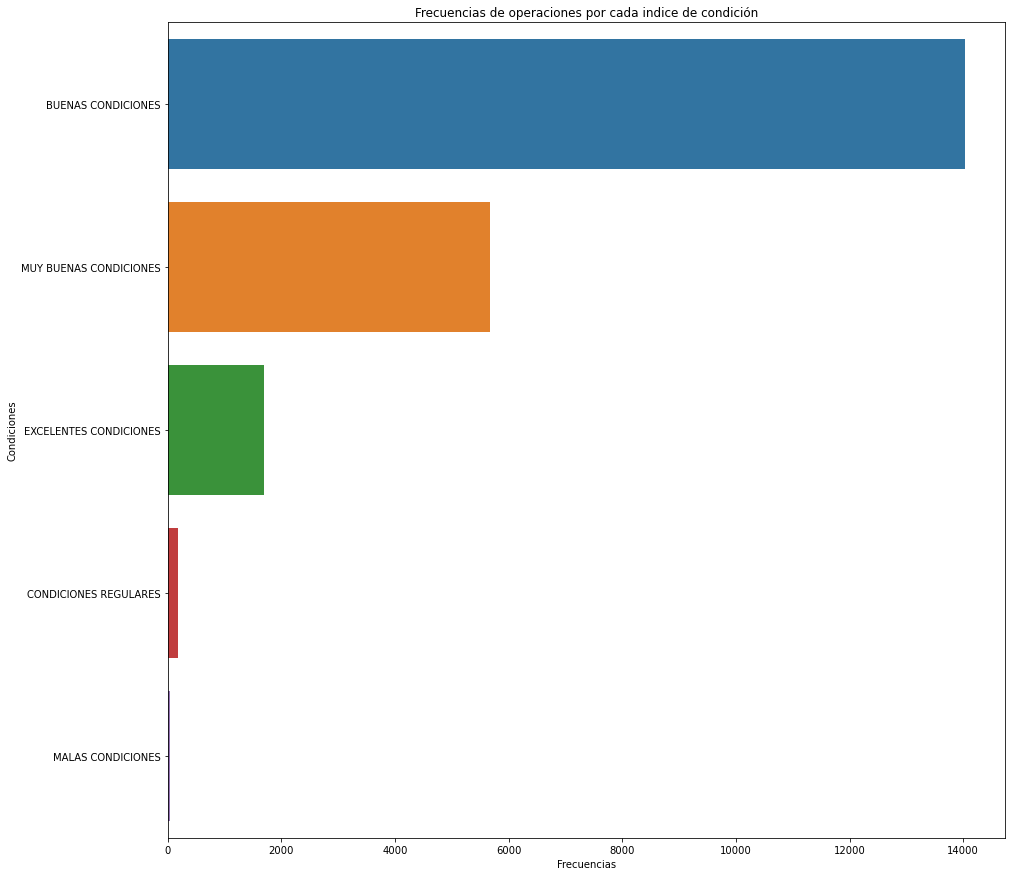

In [46]:
# Frecuencias de operaciones por cada indice de condición
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(y=df['condicion_propiedad'], order=df['condicion_propiedad'].value_counts().index)
_ = ax.set(title="Frecuencias de operaciones por cada indice de condición", ylabel='Condiciones', xlabel='Frecuencias')
plt.show()

**La mayor parte de las propiedades vendidas estan en buenas condiciones.**

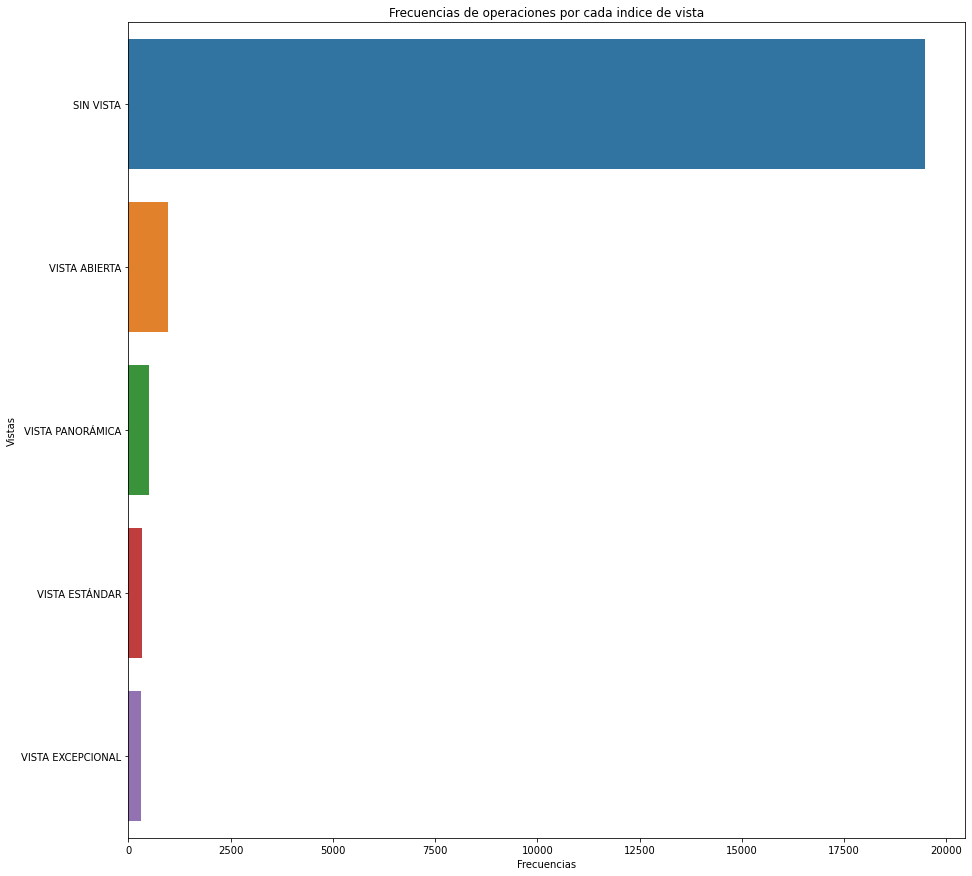

In [47]:
# Frecuencias de operaciones por cada indice de vista
fig,ax = plt.subplots(figsize=(15,15))
_ = sns.countplot(y=df['vista_propiedad'], order=df['vista_propiedad'].value_counts().index)
_ = ax.set(title="Frecuencias de operaciones por cada indice de vista", ylabel='Vistas', xlabel='Frecuencias')
plt.show()

**La mayor parte de las propiedades no cuentan con vista.**

### 6.- Scatter Plot

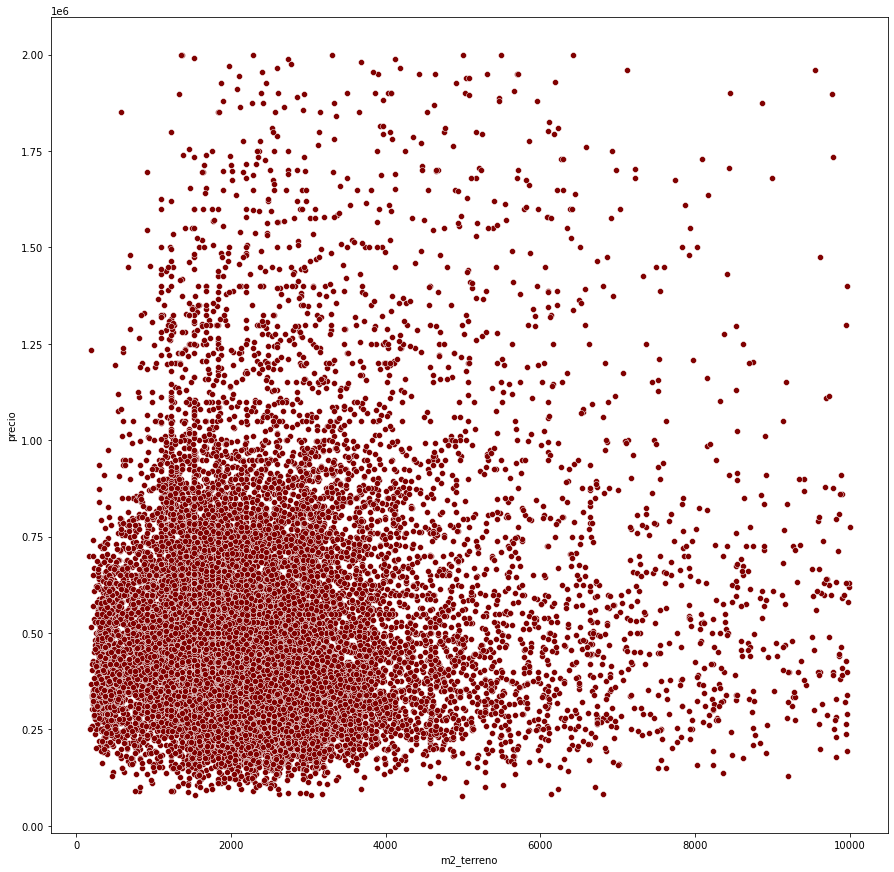

In [48]:
# Diagrama de dispersión del precio y los metros cuadrados de terreno
plt.figure(figsize=(15, 15))
sns.scatterplot(x=df_dispersion.m2_terreno, y=df_dispersion.precio, color="maroon")
plt.show()

**La mayor acumulación de datos se encuentra entre los 500 y 3500 metros cuadrados de terreno y los 250,000 y 1,000,000 de dolares.**

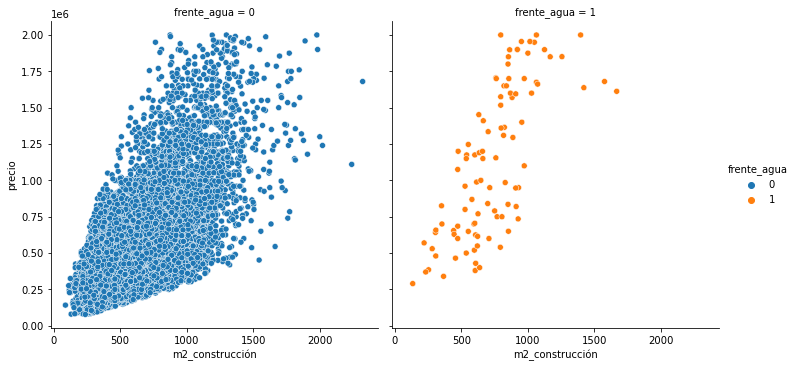

In [49]:
# Diagrama de dispersión de los metros cuadrados de construcción y el precio
sns.relplot(x="m2_construcción", y="precio",data=df_dispersion, 
            kind="scatter", col="frente_agua", hue=df_dispersion.frente_agua)
plt.show()

**Podemos observar que hay muy pocas propiedades frente al agua.**

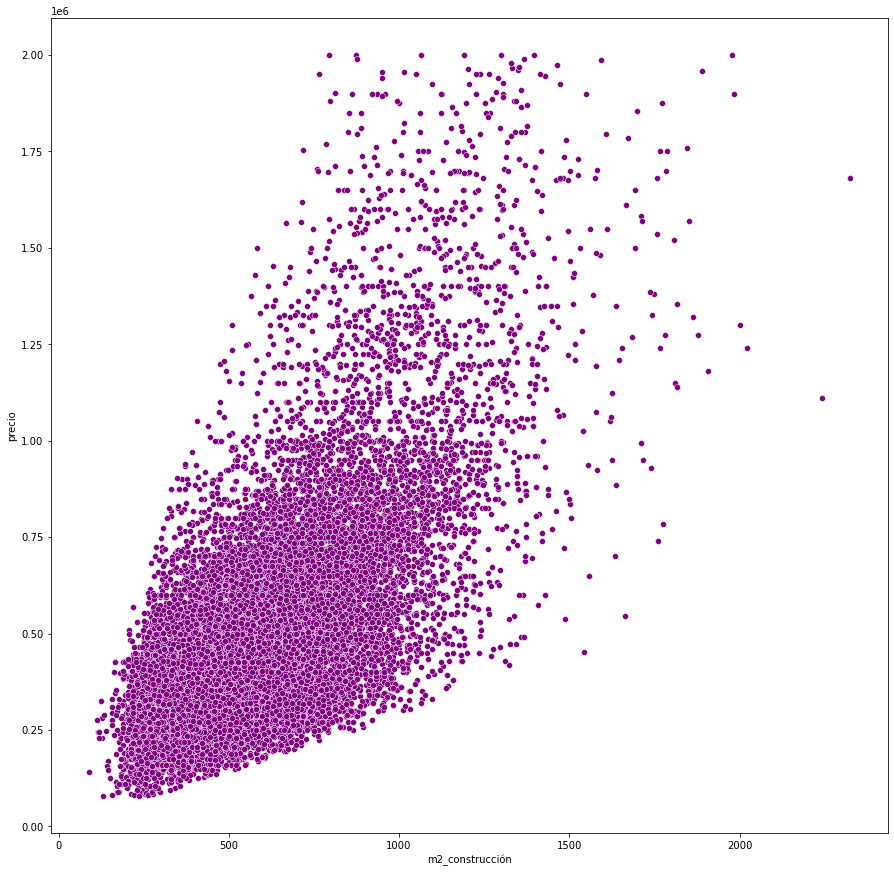

In [50]:
# Diagrama de dispersión del precio y los metros cuadrados de construcción
plt.figure(figsize=(15, 15))
sns.scatterplot(x=df_dispersion['m2_construcción'], y=df_dispersion.precio, color='purple')
plt.show()

**Podemos observar una relación positiva entre las dos variables (Entre mas metros de construcción tenga la propiedad, su precio será mas elevado) y percibir una ligera regresión lineal.**

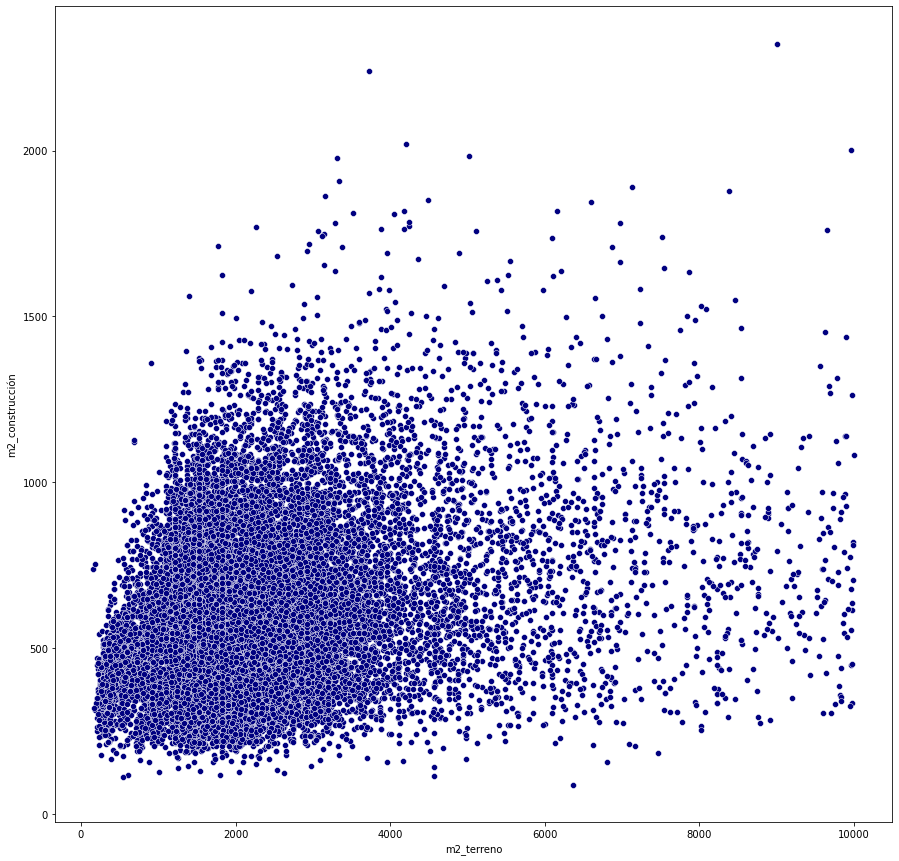

In [51]:
# Diagrama de dispersión de los metros cuadrados de construcción y los metros cuadrados de terreno
plt.figure(figsize=(15, 15))
sns.scatterplot(x=df_dispersion.m2_terreno, y=df_dispersion['m2_construcción'], color='navy')
plt.show()

**La mayor acumulación de datos se encuentra entre los 500 y 4000 metros cuadrados de terreno y los 500 y 1200 metros de construcción.**

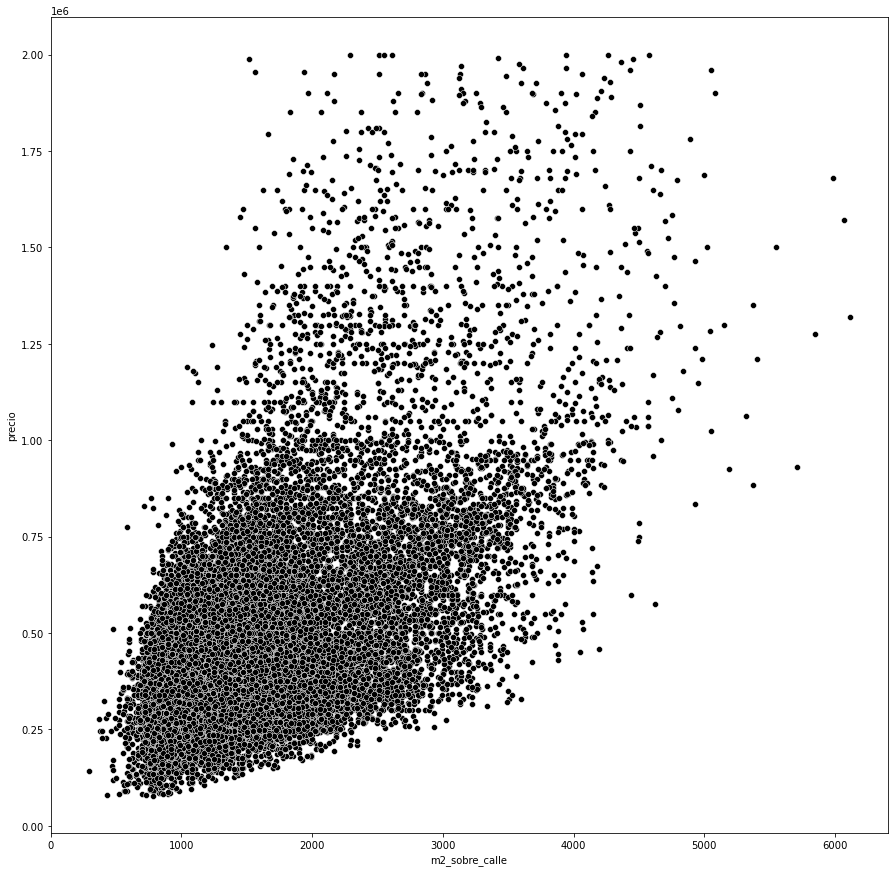

In [52]:
# Diagrama de dispersión del precio y los metros cuadrados sobre calle
plt.figure(figsize=(15, 15))
sns.scatterplot(x=df_dispersion.m2_sobre_calle, y=df_dispersion['precio'], color="black")
plt.show()

**Podemos observar una relación positiva entre las dos variables (Entre mas metros sobre calle tenga la propiedad, su precio será mas elevado).**

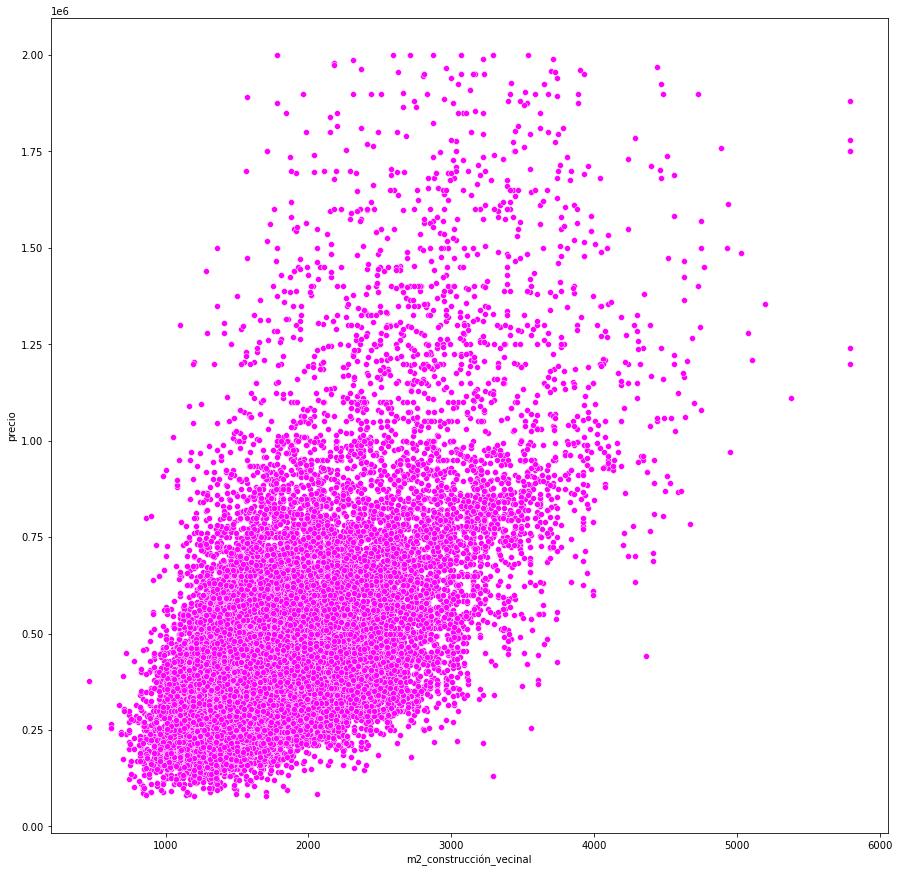

In [53]:
# Diagrama de dispersión del precio y los metros cuadrados de construcción vecinal
plt.figure(figsize=(15, 15))
sns.scatterplot(x=df_dispersion['m2_construcción_vecinal'], y=df_dispersion['precio'], color="fuchsia")
plt.show()

**Podemos observar una relación positiva entre las dos variables (Entre mas metros de construcción vecinal tenga la propiedad, su precio será mas elevado).**

### 7.- Regresión lineal

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
X = df_dispersion[['m2_construcción']]
y = df_dispersion[['precio']]
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [56]:
#Coeficiente de regresion lineal
reg.coef_ 

array([[757.94818075]])

In [57]:
# Intercección de la recta
reg.intercept_ 

array([47947.26879649])

In [58]:
# Coeficiente de determinación
print(f"El modelo de regresión lineal tiene una eficacia del {round(reg.score(X,y),2)*100}%")

El modelo de regresión lineal tiene una eficacia del 45.0%


In [59]:
for i in reg.predict(np.asmatrix([[250]])):
    for x in i:
        print(f"Una casa de 250 metros cuadrados de construcción cuesta aproximadamente: ${round(x,2)} dolares.")
for i in reg.predict(np.asmatrix([[1000]])):
    for x in i:
        print(f"Una casa de 1000 metros cuadrados de construcción cuesta aproximadamente: ${round(x,2)} dolares.")
for i in reg.predict(np.asmatrix([[2000]])):
    for x in i:
        print(f"Una casa de 2000 metros cuadrados de construcción cuesta aproximadamente: ${round(x,2)} dolares.")
for i in reg.predict(np.asmatrix([[5000]])):
    for x in i:
        print(f"Una casa de 5000 metros cuadrados de construcción cuesta aproximadamente: ${round(x,2)} dolares.")
for i in reg.predict(np.asmatrix([[10000]])):
    for x in i:
        print(f"Una casa de 10000 metros cuadrados de construcción cuesta aproximadamente: ${round(x,2)} dolares.")

Una casa de 250 metros cuadrados de construcción cuesta aproximadamente: $237434.31 dolares.
Una casa de 1000 metros cuadrados de construcción cuesta aproximadamente: $805895.45 dolares.
Una casa de 2000 metros cuadrados de construcción cuesta aproximadamente: $1563843.63 dolares.
Una casa de 5000 metros cuadrados de construcción cuesta aproximadamente: $3837688.17 dolares.
Una casa de 10000 metros cuadrados de construcción cuesta aproximadamente: $7627429.08 dolares.


### 8. Conclusiones del analísis

<font color="#6a0997" size=3.5px><b>
1.- Todos los histogramas están representados por una distribución asimétrica negativa y una curtosis leptocúrtica, lo que implica que hay una mayor acumulación de datos en la parte izquierda de los histogramas y que su contentración de datos es alta.<br><br>
2.- El mejor agente de ventas fue el Sr. Owner con más de 5000 operaciones, la Srta. Antonucci fue quien tuvo el peor desempeño en ventas, no llegando a sobrepasar las 1000 operaciones.<br><br>
3.- La relación entre el precio y los metros de construcción, resulto ser la mas fuerte con un coeficiente de determinación del %45, por lo que se estimaron los precios de algunas propiedades en base a su cantidad de metros cuadrados de construcción.<br><br>
4.- Los scatterplots del precio con las variables discretas de interes (m2_construcción, m2_terreno, m2_construcción_vecinal y m2_sobre_calle) mostraron una ligera tendencia hacia una regresion lineal, siendo m2_construcción la mas fuerte. Asimismo el scatterplot de precio y m2_terreno, asi como tambien, el de m2_construcción y m2_terreno presentaron una gran acumulación de sus datos en la parte inferior izquierda del diagrama.<br><br>
5.- El precio de una propiedad oscila entre los 250,000 y 750,000 dolares, teniendo un precio medio de 509,554.62 dolares.
6.- La cantidad de m2 de construcción oscila entre los 200 y 1000 metros cuadrados, teniendo una cantidad media de 609.56 metros cuadrados.<br><br>
7.- La cantidad de m2 de terreno oscila entre los 1000 y 3000 metros cuadrados, teniendo una cantidad media de 2447.56 metros cuadrados.<br><br>
8.-La cantidad de m2 sobre calle oscila entre los 1000 y 2500 metros cuadrados, teniendo una cantidad media de 1714.43 metros cuadrados.<br><br>
9.-La cantidad de m2 de construcción vecinal oscila entre los 1000 y 2800 metros cuadrados, teniendo una cantidad media de 1928.82 metros cuadrados.<br><br>
10.- Las propiedades mas vendidas son de un solo piso, siendo mas de 10000.<br><br>
11.- Las propiedades mas vendidas estan en buenas condiciones, representando el 65% de todas las propiedades.<br><br>
12.- La mayoria de las propiedades vendidas tienen un diseño innovador y estan en buenas condiciones.<br><br>
13.- En promedio, entre mejor sea la vista de la propiedad, mas alto será su precio, esta es la razón del por que las propiedades sin vista son las mas vendidas.<br><br>
14.- Entre mejores condiciones tenga una propiedad, mas cara será.<br><br>
15.- En el año 2014 se registraron mas del doble de ventas que en el año 2015.<br><br>
16.- Las propiedades mas vendidas no tienen vista, estan en buenas condiciones y son de un diseño promedio o innovador.<br><br>
17.- La mayor parte de las propiedades miden entre los 500 y 3500 metros cuadrados de terreno y cuestan entre 250,000 y 1,000,000 de dolares.<br><br>
18.- La mayor parte de las propiedades miden entre los 250 y 1000 metros cuadrados de construcción y cuestan entre 250,000 y 750,000 de dolares.<br><br>
18.- La mayor parte de las propiedades miden entre los 250 y 4000 metros cuadrados de terreno y entre 250 y 1000 de metros cuadrados de construcción.<br><br>
19.- La mayor parte de las propiedades miden entre los 1000 y 3000 metros sobre calle y cuestan entre 250,000 y 1,000,000 de dolares.<br><br>
20.- La mayor parte de las propiedades miden entre los 1000 y 3000 metros cuadrados de construcción vecinal y cuestan entre 250,000 y 1,000,000 de dolares.<br><br>
    
    
</font><b>

### Referencias bibliográficas

w3schools. (2021). Numpy. 19/05/2021, de w3schools Sitio web: https://www.w3schools.com/python/numpy/default.asp<br><br>
w3schools. (2021). Pandas. 19/05/2021, de w3schools Sitio web: https://www.w3schools.com/python/pandas/default.asp<br><br>
w3schools. (2021). Matplotlib. 19/05/2021, de w3schools Sitio web: https://www.w3schools.com/python/matplotlib_intro.asp  